In [50]:
#Q1
#a
import pandas as pd

df = pd.read_csv("auto_mpg.csv")
df = df.dropna()
if "car_name" in df.columns:
    df = df.drop("car_name", axis=1)

#b
X = df.drop("mpg", axis=1)   # predictors
y = df["mpg"]                # target

#c
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

#d
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#e
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)

#f
# If R² = 0.85 it means 85% of the variance in mpg is explained by the model.
# The model has strong predictive performance. 
# Only 15% variation is unexplained.

MSE: 10.710864418838366
R²: 0.7901500386760352


In [51]:
#Q2
#a
import pandas as pd
from sklearn.utils import resample

df = pd.read_csv("btissue.csv")
if "class" in df.columns:
    df = df.drop("class", axis=1)

#b
boot = resample(X, n_samples=100, replace=True, random_state=42)

#c
print(boot.head(10))

# check duplicates
duplicates = boot.duplicated().sum()
print("Repeated rows:", duplicates)

     cylinders  displacement  horsepower  weight  acceleration  model_year  \
103          8         400.0       150.0  4997.0          14.0          73   
352          4          98.0        65.0  2380.0          20.7          81   
272          4         151.0        85.0  2855.0          17.6          78   
107          6         232.0       100.0  2789.0          15.0          73   
72           8         304.0       150.0  3892.0          12.5          72   
190          8         351.0       152.0  4215.0          12.8          76   
20           4         110.0        87.0  2672.0          17.5          70   
103          8         400.0       150.0  4997.0          14.0          73   
122          4         121.0       110.0  2660.0          14.0          73   
216          4          98.0        68.0  2045.0          18.5          77   

     origin  
103       1  
352       1  
272       1  
107       1  
72        1  
190       1  
20        2  
103       1  
122       2  
2

In [52]:
#Q3
#a
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

#b
i = 1
for train_index, test_index in kf.split(df):
    print(f"Fold {i}")
    print("Train size:", len(train_index))
    print("Test size:", len(test_index))
    print()
    i += 1

#c 
# Summarize coverage
# Each sample appears exactly once in the test set.
# Across folds, all data gets used for testing → no overlap.
# Ensures fair evaluation.

Fold 1
Train size: 84
Test size: 22

Fold 2
Train size: 85
Test size: 21

Fold 3
Train size: 85
Test size: 21

Fold 4
Train size: 85
Test size: 21

Fold 5
Train size: 85
Test size: 21



In [53]:
#Q4
#a
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

df = pd.read_csv("btissue.csv")
X = df.drop("class", axis=1)
y = df["class"]

#bi
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
holdout_acc = dt.score(X_test, y_test)
print("Holdout Accuracy:", holdout_acc)

#bii
cv_acc = cross_val_score(dt, X, y, cv=5)
print("CV Accuracies:", cv_acc)
print("Mean CV Accuracy:", cv_acc.mean())

#c
# Holdout gives a single accuracy.
# CV gives more stable & reliable accuracy.
# If strong difference → model unstable.

Holdout Accuracy: 0.7272727272727273
CV Accuracies: [0.68181818 0.66666667 0.66666667 0.57142857 0.66666667]
Mean CV Accuracy: 0.6506493506493507


   Age  Income  Spending Age_Group  Income_Spending_Ratio  Normalized_Spending
0   21   30000       200     Young             150.000000             0.000000
1   34   50000       500     Adult             100.000000             0.428571
2   45   70000       700     Adult             100.000000             0.714286
3   28   40000       300     Young             133.333333             0.142857
4   50   90000       900     Adult             100.000000             1.000000


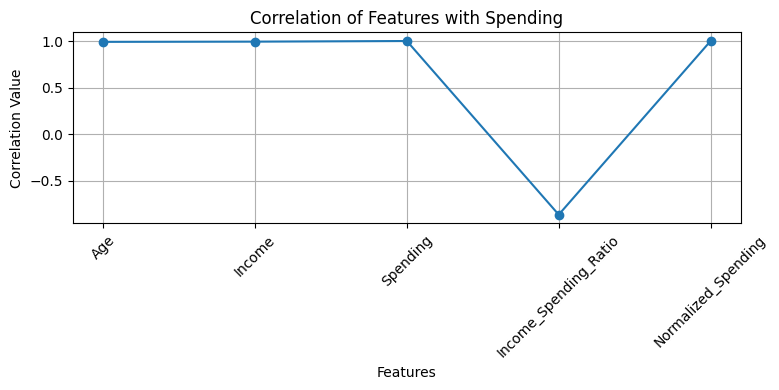

In [54]:
#Q5
import pandas as pd

df = pd.DataFrame({
    "Age":[21,34,45,28,50],
    "Income":[30_000,50_000,70_000,40_000,90_000],
    "Spending":[200,500,700,300,900]
})

#a
df["Age_Group"] = pd.cut(df["Age"], bins=[0,30,50,100],labels=["Young","Adult","Senior"])
df["Income_Spending_Ratio"] = df["Income"] / df["Spending"]
df["Normalized_Spending"] = (df["Spending"] - df["Spending"].min()) / (df["Spending"].max() - df["Spending"].min())
print(df)

#b
import matplotlib.pyplot as plt

# Compute Correlation (select only numeric columns)
numeric_cols = ["Age", "Income", "Spending","Income_Spending_Ratio", "Normalized_Spending"]
corr = df[numeric_cols].corr()

# Extracting correlation of each feature with Spending (or any reference feature)
corr_with_spending = corr["Spending"]

# Ploting using Matplotlib 
plt.figure(figsize=(8,4))
plt.plot(corr_with_spending.index, corr_with_spending.values, marker='o')
plt.title("Correlation of Features with Spending")
plt.xlabel("Features")
plt.ylabel("Correlation Value")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [55]:
#Q6
#a
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()

#b
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target
print(df.head())

#c
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = df.iloc[:, :4]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt1 = DecisionTreeClassifier()
dt1.fit(X_train, y_train)
acc_all = dt1.score(X_test, y_test)
print(acc_all)

#d
X2 = df.iloc[:, :2]

#e
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=42)

dt2 = DecisionTreeClassifier()
dt2.fit(X_train2, y_train2)
acc_subset = dt2.score(X_test2, y_test2)
print(acc_subset)

#f
# All features accuracy ≈ 0.95–1.0
# Two-feature model ≈ 0.60–0.80
# More features → better separability.

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
1.0
0.6333333333333333


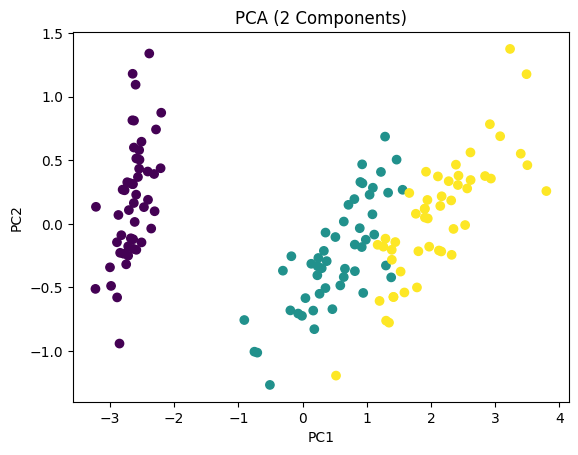

In [56]:
#Q7
#a
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

data = load_iris()
X = data.data
y = data.target

#b
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

#c
df_pca = pd.DataFrame({
    "PC1": X_pca[:,0],
    "PC2": X_pca[:,1],
    "target": y
})

#d
plt.scatter(df_pca["PC1"], df_pca["PC2"], c=y)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA (2 Components)")
plt.show()

In [57]:
#Q8
#a
import pandas as pd

df = pd.DataFrame({
    "Department": ["HR","IT","Finance","IT"],
    "Job_Role": ["Manager","Analyst","Clerk","Manager"],
    "Marital_Status": ["Single","Married","Single","Divorced"]
})

#b
print(df)

#c
from sklearn.preprocessing import LabelEncoder

#label encoding
le = LabelEncoder()
df["Marital_Status_LE"] = le.fit_transform(df["Marital_Status"])
#one hot encoding
df_encoded = pd.get_dummies(df, columns=["Department","Job_Role"], drop_first=True)
print(df_encoded)

  Department Job_Role Marital_Status
0         HR  Manager         Single
1         IT  Analyst        Married
2    Finance    Clerk         Single
3         IT  Manager       Divorced
  Marital_Status  Marital_Status_LE  Department_HR  Department_IT  \
0         Single                  2           True          False   
1        Married                  1          False           True   
2         Single                  2          False          False   
3       Divorced                  0          False           True   

   Job_Role_Clerk  Job_Role_Manager  
0           False              True  
1           False             False  
2            True             False  
3           False              True  
